# Merge Data

In [1]:
import pandas as pd
import warnings
warnings.filterwarnings("ignore")
import re

In [2]:
pd.__version__

'1.5.3'

In [3]:
import os

directory = 'D:\Dafa\Jupyter\gemasyik\data_kampus_merdeka'

df = pd.DataFrame()

for filename in os.scandir(directory):
    if filename.is_file():
        temp = pd.read_csv(filename.path)
        df = df.append(temp, ignore_index=True)

In [5]:
df

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1200558548112965632,Fri Nov 29 23:33:57 +0000 2019,0,Taat Pada Agama Saksi Yehova Dua Pelajar SMP d...,1200558548112965632,NaN,NaN,in,NaN,0,0,0,https://twitter.com/Kampus_Merdeka/status/1200...,2984157584,Kampus_Merdeka
1,1200558073233805313,Fri Nov 29 23:32:04 +0000 2019,0,Netizen Sindir Jokowi: Koruptor Dikasih Grasi ...,1200558073233805313,NaN,NaN,in,NaN,0,0,0,https://twitter.com/Kampus_Merdeka/status/1200...,2984157584,Kampus_Merdeka
2,1200557538195886080,Fri Nov 29 23:29:57 +0000 2019,0,Polisi Resmi Sebar Aparat Awasi Khatib di Masj...,1200557538195886080,NaN,NaN,in,NaN,0,0,0,https://twitter.com/Kampus_Merdeka/status/1200...,2984157584,Kampus_Merdeka
3,1200556164989087744,Fri Nov 29 23:24:29 +0000 2019,0,Akankah Kristen Dicap Radikal Juga Seperti Isl...,1200556164989087744,NaN,NaN,in,NaN,0,0,0,https://twitter.com/Kampus_Merdeka/status/1200...,2984157584,Kampus_Merdeka
4,1200035459461574656,Thu Nov 28 12:55:23 +0000 2019,11,Selamat atas kemenangan untuk kesekian kalinya...,1200035459461574656,https://pbs.twimg.com/media/EKdh4iuUwAA1jU9.jpg,NaN,in,"Kota Surabaya, Jawa Timur",1,4,4,https://twitter.com/Cak_X01/status/12000354594...,1408025444,Cak_X01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
27238,1774642818532925788,Mon Apr 01 03:39:53 +0000 2024,1,TVR 120 Setjen DPR RI : Pengenalan Lingkungan ...,1774642818532925788,NaN,NaN,in,"Gedung DPR RI, Jakarta",0,0,0,https://twitter.com/tvr_parlemen/status/177464...,1389817105722187778,tvr_parlemen
27239,1774639286459244789,Mon Apr 01 03:25:51 +0000 2024,0,#WhatsOnUnas #UnasNews Jakarta (UNAS) Universi...,1774639286459244789,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://twitter.com/UNAS1949/status/1774639286...,56605444,UNAS1949
27240,1774635680515465256,Mon Apr 01 03:11:32 +0000 2024,0,Ide Nadiem mas menteri soal Kampus/Belajar Mer...,1774635680515465256,NaN,NaN,in,"Jakarta, Indonesia",0,0,0,https://twitter.com/indrayanto/status/17746356...,39698859,indrayanto
27241,1774622336295354675,Mon Apr 01 02:18:30 +0000 2024,6,Dosen Farmasi ITB Ungkap Rahasia Bugar dan Pro...,1774622336295354675,NaN,NaN,in,Bandung - Jatinangor - Cirebon,0,2,0,https://twitter.com/itbofficial/status/1774622...,22878447,itbofficial


In [6]:
df['created_at'] = pd.to_datetime(df['created_at'], errors='coerce')
df.sort_values(by='created_at', inplace=True)
df.reset_index(drop=True, inplace=True)
df.dropna(subset=['created_at'], inplace=True)

In [7]:
df.dropna(subset=['full_text'], inplace=True)

In [11]:
len(df)

34598

<Axes: >

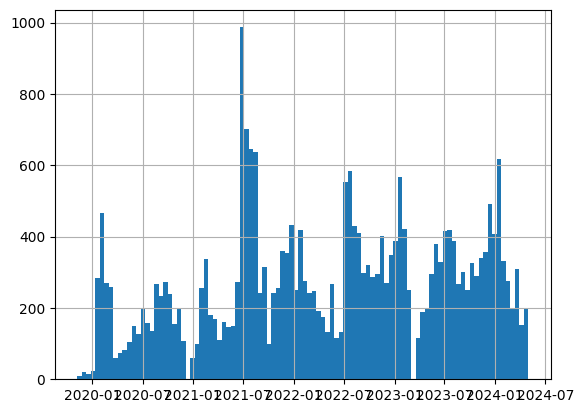

In [8]:
# visualize how much data with created_at as timestamps
df['created_at'].hist(bins=100)

# Clean Data

### Slang dan Abreviasi

In [9]:
kamus_slang=pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\kamus_slang.csv')
kamus_slang=kamus_slang.rename(columns = {'slang' : 'kamus_slang' , 'formal' : 'kamus_perbaikan'})
slang_mapping = dict(zip(kamus_slang['kamus_slang'], kamus_slang['kamus_perbaikan']))

kamus_singkatan = pd.read_csv('D:\Dafa\Jupyter\gemasyik\src\kamus_singkatan.csv', header=None, names=['sebelum_perbaikan', 'setelah_perbaikan'],delimiter=';')
singkatan_mapping=dict(zip(kamus_singkatan['sebelum_perbaikan'],kamus_singkatan['setelah_perbaikan']))

### Stopword, emoji, dan Stemmer Factory

In [10]:
from Sastrawi.Stemmer.StemmerFactory import StemmerFactory
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
import emoji
from spacy.lang.id import Indonesian
import string

In [11]:
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# List of words with negation meaning
data = emoji.EMOJI_DATA

# Remove negation words from stopwords
# stopwords = set(stopwords).difference(excluded_stopwords)
nlp = Indonesian()
factory = StemmerFactory()
stemmer = factory.create_stemmer()

In [12]:
from Sastrawi.StopWordRemover.StopWordRemoverFactory import  StopWordRemoverFactory
stopword_factory = StopWordRemoverFactory()
stopwords = stopword_factory.get_stop_words()
# stopwords

In [13]:
def replace_emoji_with_space(text, emoji_data, language='id'):
    for emoji, translations in emoji_data.items():
        if language in translations:
            text = text.replace(emoji, '')
    return text

In [14]:
def process_tweet(tweet) :
  tweet=tweet.lower()
  # link
  tweet = re.sub('((www\.[^\s]+)|(https?://[^\s]+))','',tweet)

  # spesifik
  # tweet = re.sub(r'\[username\]|\[url\]|\[askmf\]|\[sensitive-no\]|\[satu menit kemudian\]|\[seo in ha, love rain\]|\[bb\]|\[c48\]|\[idm\]', '', tweet)

  # emoji
  tweet=replace_emoji_with_space(tweet,data)
  # tweet=tweet.replace(":",' ').replace('_','mask').replace('-','rus').strip()
  # tweet=re.sub(' +', ' ', tweet)

  # username
  tweet = re.sub('@[^\s]+','',tweet)

  # hashtag
  tweet = re.sub(r'#([^\s]+)', '', tweet)

  # tokenisasi
  tokens = tweet.split()

  tweet_tokens = []
  for ele in tokens:
    ele_kamus = kamus_singkatan.get(ele, ele)
    ele_slang = slang_mapping.get(ele_kamus, ele_kamus)
    tweet_tokens.append(ele_slang)

  tweet = ' '.join(tweet_tokens)
  tweet = re.sub('[\s]+', ' ', tweet)
    #Replace #word with word
  tweet = re.sub(r'#([^\s]+)', '', tweet)
  tweet=re.sub(r'\d+', '', tweet)
  tweet = tweet.strip('\'"')
  tweet = tweet.lstrip('\'"')

  tweet = "".join([char for char in tweet if char not in string.punctuation])

  doc = nlp(tweet)

  tokens = [token.text for token in doc]
      # Hapus stopwords dari tokens
  filtered_tokens = [token for token in tokens if token.lower() not in stopwords]
  tweet = ' '.join(filtered_tokens)

  tweet=stemmer.stem(tweet)
  # tweet=tweet.replace('mask',' ').replace('rus','-')

  # hapus kata bijak dan didik
  tweet = re.sub(r'\b(?:bijak|didik)\b', '', tweet)

  # hapus spasi berlebih di awal dan akhir
  tweet = tweet.strip()

  return tweet

In [20]:
process_tweet(df['full_text'][4])

'enggak punya kenang apaapa pertama kali lihat waktu jadi host acara tanah merdeka tvri jogja terus lihat langsung pas stadium general ospek beberapa kali ketemu kampus satu fakultas amp lebih sering ketemu bantu proyek riset dosen pau ugm'

In [15]:
df.head(5)

,conversation_id_str,created_at,favorite_count,full_text,id_str,image_url,in_reply_to_screen_name,lang,location,quote_count,reply_count,retweet_count,tweet_url,user_id_str,username
0,1192476838494269442,2019-11-07 16:20:08+00:00,0,Suka Bikin Gaduh 25.200 Lebih Orang Teken Peti...,1192476838494269442,NaN,NaN,in,NaN,0,0,0,https://twitter.com/Kampus_Merdeka/status/1192...,2984157584,Kampus_Merdeka
1,1192885019213086721,2019-11-08 19:22:05+00:00,52,Nadiem Makarim berpesan kepada Rektor ITB bahw...,1192885019213086721,NaN,NaN,in,Indonesia,1,5,15,https://twitter.com/korantempo/status/11928850...,20963426,korantempo
2,1192978004827242496,2019-11-09 01:31:35+00:00,5,Kalau merdeka nanti kampus berpotensi dikuasai...,1192978004827242496,NaN,NaN,in,Indonesia,1,3,0,https://twitter.com/kautsar_myus/status/119297...,1957162076,kautsar_myus
3,1193019389643083776,2019-11-09 04:16:02+00:00,0,Nadiem Makarim Minta Kampus Bisa Merdeka https...,1193019389643083776,NaN,NaN,in,"Central Borneo, Indonesia",0,0,0,https://twitter.com/BORNEONEWS/status/11930193...,207854679,BORNEONEWS
4,1194139612332978176,2019-11-12 06:27:24+00:00,0,3. Saya gak punya kenangan apa2 kecuali pertam...,1194139612332978176,NaN,NaN,in,NaN,0,1,0,https://twitter.com/booedi/status/119413961233...,84267953,booedi


In [21]:
df['full_text'] = df['full_text'].apply(lambda x: process_tweet(str(x)))

In [22]:
df.to_csv('cleaned_km.csv')

In [23]:
(df['full_text'])

0        suka bikin gaduh lebih orang teken petisi ui p...
1        nadiem makarim pesan rektor itb kampus merdeka...
2        kalau merdeka kampus potensi asai pikir berang...
3                      nadiem makarim minta kampus merdeka
4        enggak punya kenang apaapa pertama kali lihat ...
                               ...                        
27238    yakinin ku buat ikut kampus merdeka mending ik...
27239    samsat gandeng unp gelar sakapa layan bayar pa...
27240    gue pas covid enggak punya duit samsek gue kag...
27241    ipb university raih prestasi luar biasa the ap...
27242    kampus merdeka enggak magang kampus ajar dllny...
Name: full_text, Length: 27243, dtype: object

In [24]:
df.duplicated(subset=['full_text']).sum()

1708